## **Análise Exploratória de Dados (EDA)**
---
"Unicorn" é um termo usado na indústria de capital de risco para descrever uma empresa startup de capital privado com um valor de mais de $1 bilhão.

https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups

Jhecy Ketlin


In [ ]:
# importando bilbiotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date

In [ ]:
# importando base de dados
base_dados = pd.read_csv('/content/Startups+in+2021+end.csv')

In [ ]:
# ver qts linhas e colunas na base de dados
base_dados.shape

(936, 8)

In [ ]:
# 5 primeiras linhas
base_dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
# nome das colunas
base_dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [ ]:
# renomear as colunas da base de dados
base_dados.rename (columns ={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'País',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Select Investors' : 'Investidores'
}, inplace = True) # aplica a  troca na base dados original

In [ ]:
# informações gerais sobre a base_dados
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor           936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
#tirar $ vas linhas da coluna 'valor'
base_dados['Valor'] = base_dados['Valor'].replace('[^\d.]', ' ', regex = True)


dtype('float64')

In [ ]:
#transformar o tipo da coluna 'valor'
base_dados['Valor'] = base_dados['Valor'].astype(float)

base_dados.head()

,Id,Empresa,Valor,Data de Adesão,País,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
#transformar o tipode dado da coluna 'Data de Adesão'
base_dados['Data de Adesão'] = pd.to_datetime(base_dados['Data de Adesão'])

In [ ]:
# extrair mes da data
base_dados['Mes'] = pd.DatetimeIndex(base_dados['Data de Adesão']).month

base_dados.head()

,Id,Empresa,Valor,Data de Adesão,País,Cidade,Setor,Investidores,Mes
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1


In [ ]:
# extrair ano da data
base_dados['Ano'] = pd.DatetimeIndex(base_dados['Data de Adesão']).year

base_dados.head()

,Id,Empresa,Valor,Data de Adesão,País,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
#somar os valores nulos da base_dados
base_dados.isnull().sum()

,0
Id,0
Empresa,0
Valor,0
Data de Adesão,0
País,0
Cidade,15
Setor,0
Investidores,1


In [ ]:
#qtd de valores únicos da base_dados
base_dados.nunique()

,0
Id,936
Empresa,935
Valor,192
Data de Adesão,589
País,47
Cidade,239
Setor,17
Investidores,920


In [ ]:
# Distribuição de frequência absoluta da coluna 'setor'
base_dados['Setor'].value_counts() #outra forma base_dados.Setor.value_counts()

,count
Setor,
Fintech,190
Internet software & services,167
E-commerce & direct-to-consumer,102
Artificial intelligence,69
Health,63
"Supply chain, logistics, & delivery",51
Other,51
Cybersecurity,41
Mobile & telecommunications,37


In [ ]:
# Distribuição de frequência percentual da coluna 'Setor'
base_dados['Setor'].value_counts(normalize= True)

,proportion
Setor,
Fintech,0.202991
Internet software & services,0.178419
E-commerce & direct-to-consumer,0.108974
Artificial intelligence,0.073718
Health,0.067308
"Supply chain, logistics, & delivery",0.054487
Other,0.054487
Cybersecurity,0.043803
Mobile & telecommunications,0.039530


Primeiro fazemos o gráifco depois nos preocupamos com o design dele.
  1° plt.bar
  2° plt.xticks
  3° plt.figsize e plt.title

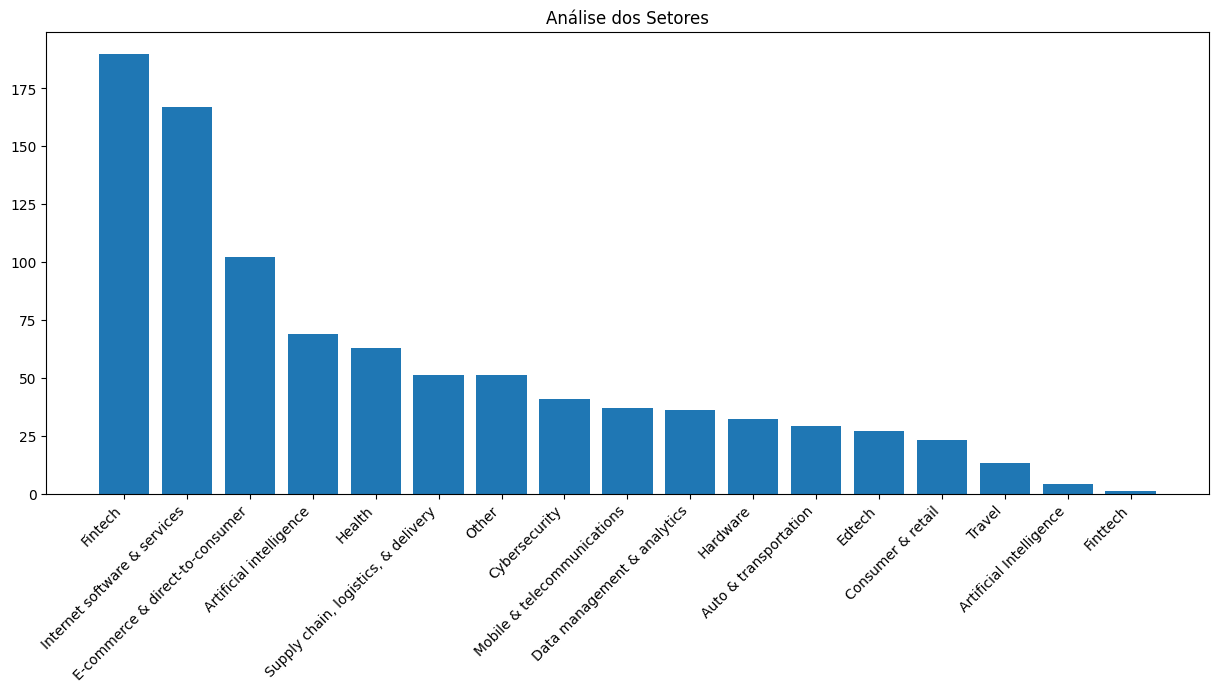

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Análise dos Setores')
plt.bar(
    base_dados['Setor'].value_counts().index,#torna cada ocorrência da coluna 'Setor' em index (rótulos)
    base_dados['Setor'].value_counts() #mostra a distribuição de frequência de cada ocorrência da coluna 'Setor'
)
plt.xticks(rotation=45, ha='right'); #esse ponto final é pra tirar umas infos acima do gráfico

In [ ]:
Analise_percentual= round(base_dados['País'].value_counts(normalize= True)*100,1)

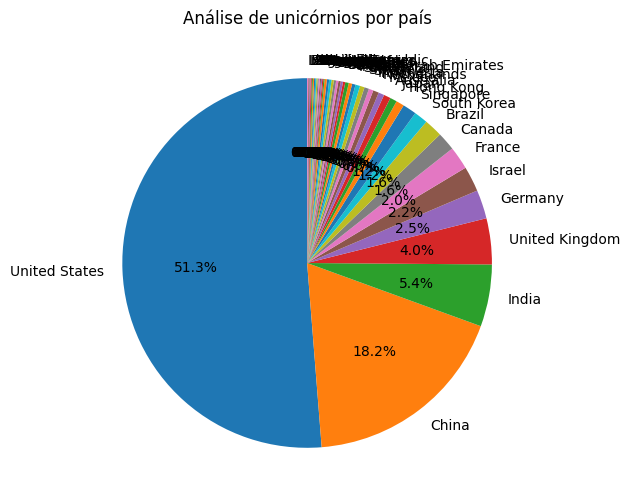

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Análise de unicórnios por país')
plt.pie(
    Analise_percentual, #dados usados como referencia
    labels = Analise_percentual.index, ##torna cada ocorrência da coluna 'País' em index (rótulos)
    autopct='%1.1f%%',
    startangle=90,
);



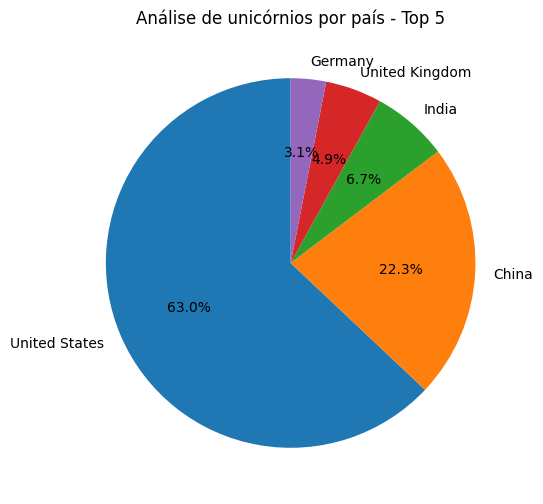

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Análise de unicórnios por país - Top 5')
plt.pie(
    Analise_percentual.head(),
    labels = Analise_percentual.index[0:5],
    autopct='%1.1f%%',
    startangle=90,
);

Ao usar .groupby vc agrupa a base de dados de acordo com as colunas especificadas e o index viram essas colunas em questão. O reset_index redefine o index da base de dados

.count()['Id'] #conta valores não nulos e cada coluna e coloca o resultado da contagem na coluna 'Id'

.reset_index() #redefine o index

In [ ]:
#nova base de dados agrupada de acordo com as colunas especificadas
analise_agrupada = base_dados.groupby(by=['País', 'Ano', 'Mes', 'Empresa']).count()['Id'].reset_index()

analise_agrupada

,País,Ano,Mes,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [ ]:
#filtrando a base de dados só com empresas do Brasil
analise_agrupada.loc[
    analise_agrupada['País'] == 'Brazil'
]

,País,Ano,Mes,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1



['Valor'].sum() -->  seleciona a coluna valores para realizar soma




In [ ]:
#somar a coluna 'Valor' de cada país
analise_pais = base_dados.groupby( by=['País'] )['Valor'].sum().reset_index()

analise_pais


,País,Valor
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60
5,Brazil,61.05
6,Canada,37.73
7,Chile,1.50
8,China,569.48
9,Colombia,6.40


In [ ]:
# ordenar o analise_pais de acordo com a coluna 'Valor'
analise_pais = analise_pais.sort_values('Valor', ascending =False)

analise_pais

,País,Valor
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


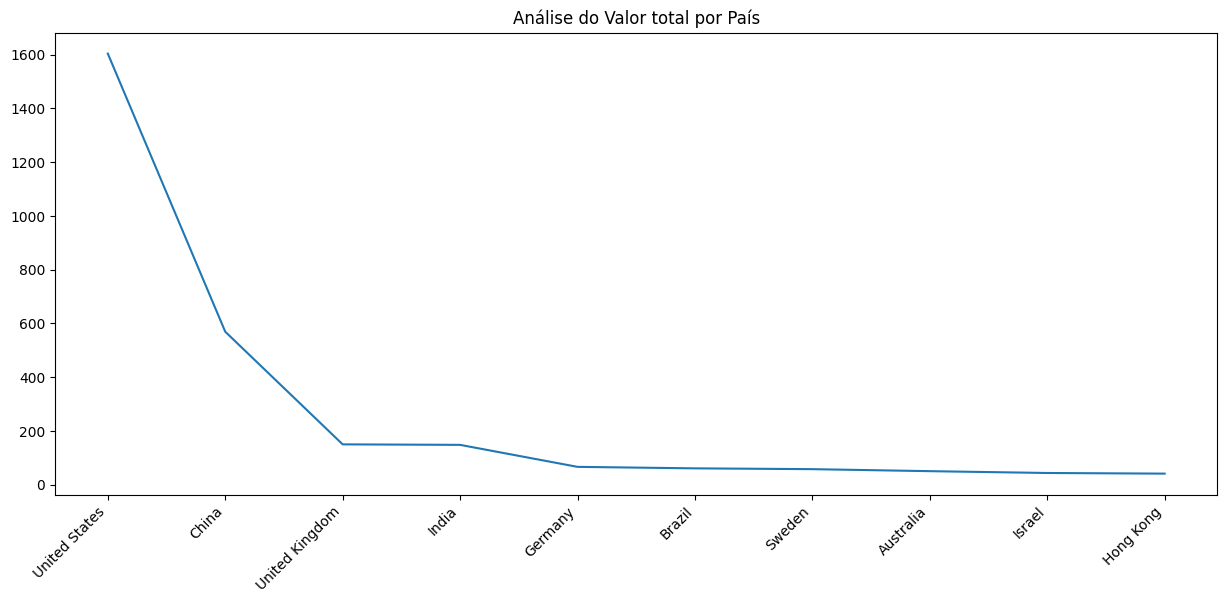

In [ ]:
analise_pais_top10 = analise_pais.head(10)

plt.figure(figsize = (15,6))
plt.title('Análise do Valor total por País')
plt.plot (analise_pais_top10['País'], analise_pais_top10['Valor']) # plt.plot(x,y)
plt.xticks(rotation=45, ha='right');